<h3>
PSM Project: Statistical Modeling on Online Retail Dataset
</h3>
<h3 align=right> Name: Narendrakumar</h3>
<h3 align=right> Date: 14/06/2020</h3>

## Data Description

**Source:**

Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


**Data Set Information:**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Attribute Information:

- <u>InvoiceNo</u>: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

- <u>StockCode</u>: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

- <u>Description</u>: Product (item) name. Nominal.

- <u>Quantity</u>: The quantities of each product (item) per transaction. Numeric.

- <u>InvoiceDate</u>: Invice Date and time. Numeric, the day and time when each transaction was generated.

- <u>UnitPrice</u>: Unit price. Numeric, Product price per unit in sterling.

- <u>CustomerID</u>: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

- <u>Country</u>: Country name. Nominal, the name of the country where each customer resides.


In [1]:
# For data downloading automation
import os
from six.moves import urllib

import datetime

# Import required Libraries for data hanadling
import numpy as np
import pandas as pd
from prettytable import PrettyTable

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### First component in your report: Motivate in your own words why you picked this dataset. Describe the data acquisition. Which steps did you have to take to download the data.

This is a huge data set with systematically collected data of over 500000 observations. Dealing with such a large datset with exploratory data analysis would be very intersting. In this notebook, I'll clean the dataset and perform exploratory data analysis using prinicipals of statistical modelling.

This dataset is extratced from the UCI Machine Learning Repository. It is a transactional data set which contains all the transactions of a UK based non-store online retail enterprise occurring between 2010-12-01 and 2011-12-09. The company primarily sells many kinds of gifts for all occasions. Most of the customers are wholersalers. 

I downloaded the data from UCI machine learning repository in .csv format.

Our dataset consists of 8 features and 541909 observations.

In [ ]:
# script toautomatically download the data from the source server
root = "https://archive.ics.uci.edu/ml/machine-learning-databases/"
path = "D:/OneDrive - Jacobs University/DS projects/PSM"
dataset_url = root + "/00502/online_retail_II.xlsx"

def fetch_data(url=dataset_url, download_path=path):
    os.makedirs(download_path, exist_ok=True)
    file_destination = os.path.join(download_path, "online_retail_II.xlsx")
    urllib.request.urlretrieve(url, file_destination)

In [ ]:
fetch_data()

#### Second component in your report: Describe the raw dataset in mathematical correct formalism (which is typically a product of several different sample spaces), define the universe in which the data has been taken, what are the RV functions, and the data value spaces S.

## Data Pre-processing

#### Describe whether you had to clean the data, are there any missing values, how did you deal with missing values? Show excerpts of the raw data.

First step is to read the dataset into a pandas dataframe and then take a first hand look the data.
Then we shall investigate if the dataframe has any missing values and if there is any cleaning required.

In [2]:
# Load the online retail datset into dataframe 
online_retail_df = pd.read_excel("Online Retail.xlsx" , parse_dates=['InvoiceDate'], dtype={'CustomerID':str}, index_col='InvoiceDate')
# Shape of the dataset
online_retail_df.shape

(541909, 7)

In [3]:
# Look at a few random records from the datset
online_retail_df.sample(6)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-07-20 11:55:00,560689,21215,IVORY PAPER CUP CAKE CASES,2,0.55,15039,United Kingdom
2011-07-19 13:01:00,560555,21179,NO JUNK MAIL METAL SIGN,1,0.39,14178,United Kingdom
2011-07-11 14:47:00,559680,22922,FRIDGE MAGNETS US DINER ASSORTED,12,0.85,12717,Greece
2011-11-02 08:44:00,573921,22920,HERB MARKER BASIL,12,0.65,16352,United Kingdom
2011-05-24 12:10:00,554415,84946,ANTIQUE SILVER T-LIGHT GLASS,24,1.25,18202,United Kingdom
2011-11-07 11:40:00,574839,22913,RED COAT RACK PARIS FASHION,1,4.95,15493,United Kingdom


In [4]:
# get datatype information for each column
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  object 
 6   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 33.1+ MB


From this information, we can notice that there are missing values in the variables **Description** and **CustomerId**.

In [5]:
# Get an idea about the quantitative varaibles.
online_retail_df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [6]:
# describe columns of categorical dtype
online_retail_df.describe(include=[np.object])

,InvoiceNo,StockCode,Description,CustomerID,Country
count,541909,541909,540455,406829,541909
unique,25900,4070,4223,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841,United Kingdom
freq,1114,2313,2369,7983,495478


The first thing we can notice is that there are some negative values in the variable **Quantity** and **UnitPrice**. This can either mean that the products with these quantities (or corresponding UnitPrice values) was returned or cancelled.

As mentioned in the description of the dataset, some InvoiceNo start with the letter "c", which refer to cancelled orders. Let's verify if this assumption is correct by taking an example of Quantity = -80995. Let's look for the cancelled invoices and check if there is an invoice with the Quantity = -80995.

In [7]:
# cancelled transactions
cancelled_orders = online_retail_df[online_retail_df['InvoiceNo'].astype(str).str.startswith("C", np.nan==False)]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 09:41:00,C536379,D,Discount,-1,27.50,14527,United Kingdom
2010-12-01 09:49:00,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311,United Kingdom
2010-12-01 10:24:00,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548,United Kingdom
2010-12-01 10:24:00,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548,United Kingdom
2010-12-01 10:24:00,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548,United Kingdom


In [8]:
# Lookfor the record where Quantity=-80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-12-09 09:27:00,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2.08,16446,United Kingdom


In [9]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,


From the above analysis it is evident that the records with negative quantity corresponds to cancelled orders, because there are no orders with positive quantity where the InvoiceNo has the prefix 'C'. The most interesting aspect of this revelation is we can discard the cancelled orders, because these orders should not be added to the total revenue. However, these records can be separately analysed to understand how many orders were cancelled. Or many other questions related to cancelled orders.

In our case, we will go ahead and remove these records from the dataframe.

In [10]:
# cancelled orders
cancelled_orders = online_retail_df["InvoiceNo"].str.startswith("C", np.nan==False).sum()
print("Total number of cancelled orders: {}".format(cancelled_orders))

# #percentage of cancelled orders in total orders
# total_orders = online_retail_df['InvoiceNo'].nunique()
# print('Percentage of cancelled orders: {}/{} ({:.2f}%) '.format(cancelled_orders, total_orders, cancelled_orders/total_orders*100))

Total number of cancelled orders: 9288


In [11]:
# removing all 9288 cancelled trascations.
online_retail_df = online_retail_df[~online_retail_df["InvoiceNo"].str.startswith("C", np.nan==False)]
print("Removed all {} cancelled transactions from the dataframe".format(cancelled_orders))

Removed all 9288 cancelled transactions from the dataframe


In [12]:
# check if there are any more trasactions with negative UnitPrice or negative Quantity
online_retail_df.loc[(online_retail_df['UnitPrice']==0) | (online_retail_df['Quantity']<=0)].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 11:52:00,536414,22139,NaN,56,0.0,NaN,United Kingdom
2010-12-01 14:32:00,536545,21134,NaN,1,0.0,NaN,United Kingdom
2010-12-01 14:33:00,536546,22145,NaN,1,0.0,NaN,United Kingdom
2010-12-01 14:33:00,536547,37509,NaN,1,0.0,NaN,United Kingdom
2010-12-01 14:34:00,536549,85226A,NaN,1,0.0,NaN,United Kingdom


In [13]:
# explore the records with Quantity==0
online_retail_df.loc[(online_retail_df['Quantity']==0)].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,


In [14]:
# explore the records with UnitPrice<0
online_retail_df.loc[(online_retail_df['UnitPrice']<0)].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-08-12 14:51:00,A563186,B,Adjust bad debt,1,-11062.06,NaN,United Kingdom
2011-08-12 14:52:00,A563187,B,Adjust bad debt,1,-11062.06,NaN,United Kingdom


In [15]:
online_retail_df.loc[(online_retail_df['InvoiceNo']=='A563186') | (online_retail_df['InvoiceNo']=='A563187')]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-08-12 14:51:00,A563186,B,Adjust bad debt,1,-11062.06,NaN,United Kingdom
2011-08-12 14:52:00,A563187,B,Adjust bad debt,1,-11062.06,NaN,United Kingdom


Even after removing the cancelled orders, there are many transactions with negative or zero UnitPirces and negative Quantity. What do these transactions signify and Can we discard them?

There are 2 records with negative UnitPrices and their corresponding InvoiceNo are unique and hence we can conclude that, they are not reversal transactions. From the description, we can assume that, they are just adjustment codes.

Now, for the records with UnitPrice==0, the quantities associated with them is negative. Even though, I would prefer to check this scenario with the Data Provider, in this case it is safe to assume that the records negative quantities and zero UnitPrices do not contribute the Revenue (because total price for these transactions would be 0). Therefore, we can discard these records from the dataset for our analysis.

In [16]:
# transactions with UnitPrice==0
zero_up = online_retail_df[(online_retail_df['UnitPrice']<=0)]['UnitPrice'].count()
print("Total number of records with UnitPrice=0: {}".format(zero_up))

Total number of records with UnitPrice=0: 2517


In [17]:
# removing all 2517 trascations with UnitPrice=0.
online_retail_df = online_retail_df[(online_retail_df['UnitPrice']>0)]
print("Removed all {} trascations with UnitPrice=0".format(zero_up))

Removed all 2517 trascations with UnitPrice=0


### Outlier Detection

In [18]:
online_retail_df.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


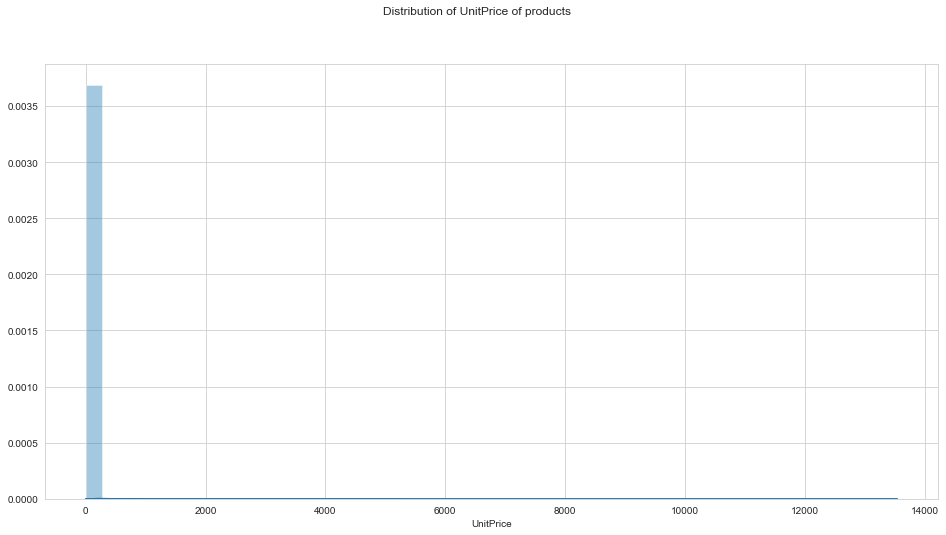

In [19]:
fig, axes = plt.subplots(figsize=(16, 8))
sns.distplot(online_retail_df['UnitPrice'], ax=axes)
# sns.boxplot(online_retail_df['TotalPrice'],orient='v', ax=axes[1])
# sns.distplot(np.log10(online_retail_df['TotalPrice']), ax=axes[1])
fig.suptitle("Distribution of UnitPrice of products")
plt.show(fig)

The above positively skewed distribution of UnitPrice clearly implies that there are some outlier in high ranges greater than 10 sterlings. It will be intersting to look at the customers who purchased the products with high prices. For now we shall see the IQR statistics of the variable 'UnitPrice' too identify and seperate te outliers from the data.

In [20]:
# Computing IQR
Min = online_retail_df['Quantity'].min()
Q1 = online_retail_df['Quantity'].quantile(0.25)
Q2 = online_retail_df['Quantity'].quantile(0.50)
Q3 = online_retail_df['Quantity'].quantile(0.75)
Max = online_retail_df['Quantity'].max()
IQR = Q3 - Q1
Lowerbound = Q1 - 1 * IQR
Upperbound = Q1 + 1 * IQR

IQR_list = [['Min', Min], ['Q1', Q1],['Q2', Q2],['Q3', Q3], ['Max', Max], 
            ['IQR', IQR], ['Lowerbound', Lowerbound], ['Upperbound', Upperbound]]

QuantityTable = PrettyTable(['Statistic', 'Value'])

for stat in IQR_list:
    QuantityTable.add_row(stat)
    
print(QuantityTable)

+------------+-------+
| Statistic  | Value |
+------------+-------+
|    Min     |   1   |
|     Q1     |  1.0  |
|     Q2     |  3.0  |
|     Q3     |  10.0 |
|    Max     | 80995 |
|    IQR     |  9.0  |
| Lowerbound |  -8.0 |
| Upperbound |  10.0 |
+------------+-------+


In [21]:
# Computing IQR
Min = online_retail_df['UnitPrice'].min()
Q1 = online_retail_df['UnitPrice'].quantile(0.25)
Q2 = online_retail_df['UnitPrice'].quantile(0.50)
Q3 = online_retail_df['UnitPrice'].quantile(0.75)
Max = online_retail_df['UnitPrice'].max()
IQR = Q3 - Q1
Lowerbound = Q1 - 1 * IQR
Upperbound = Q1 + 1 * IQR

IQR_list = [['Min', Min], ['Q1', Q1],['Q2', Q2],['Q3', Q3], ['Max', Max], 
            ['IQR', IQR], ['Lowerbound', Lowerbound], ['Upperbound', Upperbound]]

UnitPriceTable = PrettyTable(['Statistic', 'Value'])

for stat in IQR_list:
    UnitPriceTable.add_row(stat)
    
print(UnitPriceTable)

+------------+----------+
| Statistic  |  Value   |
+------------+----------+
|    Min     |  0.001   |
|     Q1     |   1.25   |
|     Q2     |   2.08   |
|     Q3     |   4.13   |
|    Max     | 13541.33 |
|    IQR     |   2.88   |
| Lowerbound |  -1.63   |
| Upperbound |   4.13   |
+------------+----------+


In [22]:
# Skewness and Kurtosis
print("Skewness : %f" % online_retail_df['UnitPrice'].skew())
print("Kurtosis : %f" % online_retail_df['UnitPrice'].kurt())
# Skewness and Kurtosis
print("Skewness : %f" % online_retail_df['Quantity'].skew())
print("Kurtosis : %f" % online_retail_df['Quantity'].kurt())

Skewness : 206.087555
Kurtosis : 62483.142715
Skewness : 471.727716
Kurtosis : 236462.342826


In [23]:
outlier_stocks = online_retail_df[online_retail_df['UnitPrice']>5.0]['StockCode'].nunique()
print("Transactions with products whose Unit Prices are greater than 5 Sterlings is {:.2%}".format(outlier_stocks / online_retail_df['StockCode'].nunique()))

Transactions with products whose Unit Prices are greater than 5 Sterlings is 39.67%


In [24]:
# removing outlier trascations with UnitPrice>15.
online_retail_df = online_retail_df[(online_retail_df['UnitPrice']<5)]
print("Removed all {} trascations with UnitPrice>5".format(outlier_stocks))

Removed all 1556 trascations with UnitPrice>5


In [25]:
outlier_quantites = online_retail_df[online_retail_df['Quantity']>50.0]['InvoiceNo'].nunique()
print("Transactions with quantites greater than 10 units is {:.2%}".format(outlier_quantites / online_retail_df['InvoiceNo'].nunique()))

Transactions with quantites greater than 10 units is 20.81%


In [26]:
# removing outlier trascations with UnitPrice>15.
online_retail_df = online_retail_df[(online_retail_df['Quantity']<50)]
print("Removed all {} trascations with Quantity>50".format(outlier_stocks))

Removed all 1556 trascations with Quantity>50


As we can see from the statistics, the Maximum value of the UnitPrice is way beyond the upperboud of 4.13. This means prices of most of the prodcuts is below 5 sterlings. The products with UnitPrices beyond upperbound can be considered as Outliers. It can be observed that only 8.54% of the all transactions are having Unit Prices greater than 15 Sterlings which is almost 4 times the value of upperbound. On that account, we can remove the transactions with these Products, as they disturb the overall distribution which in turn may impact the analysis. However, these products can be analysed seperately.

As we had seen earlier, there were missing values in variables **Description** and **CustomerId**.

**Description** --> 135080

**CustomerId** --> 1454

Now let us see if these values still exist after removing the records with cancelled inovoices and zero unit prices.

In [27]:
#checking for missing values
data_stats = pd.DataFrame(columns=['column_name','values','values_count_incna',
                                   'values_count_nona','miss_num','miss_pct'])
tmp = pd.DataFrame()

for c in online_retail_df.columns:
    tmp['column_name'] = [c]
    tmp['values'] = [online_retail_df[c].unique()]
    tmp['values_count_incna'] = len(online_retail_df[c].unique())
    tmp['values_count_nona'] = (online_retail_df[c].nunique())
    tmp['miss_num'] = online_retail_df[c].isnull().sum()
    tmp['miss_pct'] = (online_retail_df[c].isnull().sum() / len(online_retail_df)) *100
    data_stats = data_stats.append(tmp)
data_stats.sort_values(by = 'values_count_incna',ascending=False,inplace=True)
data_stats.sort_values(by = 'miss_pct',ascending=False)

,column_name,values,values_count_incna,values_count_nona,miss_num,miss_pct
0,CustomerID,"[17850, 13047, 12583, 15291, 14688, 17809, 153...",4211,4210,97298,22.537919
0,InvoiceNo,"[536365, 536366, 536367, 536368, 536370, 53637...",18423,18423,0,0.000000
0,Description,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",3514,3514,0,0.000000
0,StockCode,"[85123A, 71053, 84406B, 84029G, 84029E, 21730,...",3402,3402,0,0.000000
0,UnitPrice,"[2.55, 3.39, 2.75, 4.25, 1.85, 1.69, 2.1, 3.75...",221,221,0,0.000000
0,Quantity,"[6, 8, 32, 3, 24, 12, 48, 18, 20, 36, 2, 10, 2...",49,49,0,0.000000
0,Country,"[United Kingdom, France, Australia, Germany, N...",38,38,0,0.000000


While addressing the above cancelled orders issue, the records where the Description variable had missing values are also eliminated. Now we should handle the missing values in the variable CustomerID. We know that, CustomerID is a 5 digit unique integer assigned to each Customer. Therefore, we can assign a default ID to all those missing values. This approach of retaining the records by assigning default value instead of eliminating them, can help us analysing the overall revenue.

Let us Impute the missing CustomerIDs with default value of '99999'

In [28]:
online_retail_df[online_retail_df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 14:32:00,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,United Kingdom
2010-12-01 14:32:00,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,United Kingdom
2010-12-01 14:32:00,536544,21786,POLKADOT RAIN HAT,4,0.85,NaN,United Kingdom
2010-12-01 14:32:00,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,United Kingdom
2010-12-01 14:32:00,536544,21790,VINTAGE SNAP CARDS,9,1.66,NaN,United Kingdom


In [29]:
# assign '99999' as the default CustomerID for missing IDs
online_retail_df['CustomerID'][online_retail_df['CustomerID'].isna()] = '99999'

In [30]:
online_retail_df[online_retail_df['CustomerID']=='99999']

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 14:32:00,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,99999,United Kingdom
2010-12-01 14:32:00,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,99999,United Kingdom
2010-12-01 14:32:00,536544,21786,POLKADOT RAIN HAT,4,0.85,99999,United Kingdom
2010-12-01 14:32:00,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,99999,United Kingdom
2010-12-01 14:32:00,536544,21790,VINTAGE SNAP CARDS,9,1.66,99999,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 10:26:00,581498,85049a,TRADITIONAL CHRISTMAS RIBBONS,5,3.29,99999,United Kingdom
2011-12-09 10:26:00,581498,85049e,SCANDINAVIAN REDS RIBBONS,4,3.29,99999,United Kingdom
2011-12-09 10:26:00,581498,85099B,JUMBO BAG RED RETROSPOT,5,4.13,99999,United Kingdom


In [31]:
#checking for missing values again after removing few unwanted transactions
data_stats = pd.DataFrame(columns=['column_name','values','values_count_incna',
                                   'values_count_nona','miss_num','miss_pct'])
tmp = pd.DataFrame()

for c in online_retail_df.columns:
    tmp['column_name'] = [c]
    tmp['values'] = [online_retail_df[c].unique()]
    tmp['values_count_incna'] = len(online_retail_df[c].unique())
    tmp['values_count_nona'] = (online_retail_df[c].nunique())
    tmp['miss_num'] = online_retail_df[c].isnull().sum()
    tmp['miss_pct'] = (online_retail_df[c].isnull().sum() / len(online_retail_df)) *100
    data_stats = data_stats.append(tmp)
data_stats.sort_values(by = 'values_count_incna',ascending=False,inplace=True)
data_stats.sort_values(by = 'miss_pct',ascending=False)

,column_name,values,values_count_incna,values_count_nona,miss_num,miss_pct
0,InvoiceNo,"[536365, 536366, 536367, 536368, 536370, 53637...",18423,18423,0,0.0
0,CustomerID,"[17850, 13047, 12583, 15291, 14688, 17809, 153...",4211,4211,0,0.0
0,Description,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",3514,3514,0,0.0
0,StockCode,"[85123A, 71053, 84406B, 84029G, 84029E, 21730,...",3402,3402,0,0.0
0,UnitPrice,"[2.55, 3.39, 2.75, 4.25, 1.85, 1.69, 2.1, 3.75...",221,221,0,0.0
0,Quantity,"[6, 8, 32, 3, 24, 12, 48, 18, 20, 36, 2, 10, 2...",49,49,0,0.0
0,Country,"[United Kingdom, France, Australia, Germany, N...",38,38,0,0.0


Now there are no missing values. The dataset is also pretty much cleaned. It is now time to introduce a new feature 'TotalPrice' to the dataset which is derived from the existing features UnitPrice * Quantity.

And also we have to parse the Invoice Date column into Date and Time sepeartely, so it helps us to do the time series analysis easier.

In [32]:
online_retail_df['FullDate'] = pd.to_datetime(online_retail_df.index)

In [33]:
# creating new feature total_price = unit price * quantity.
online_retail_df["TotalPrice"] = online_retail_df["UnitPrice"] * online_retail_df['Quantity']

In [34]:
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,FullDate,TotalPrice
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34


## Data Exploration

Let’s start the data exploration phase with density plots and scatter plot matrix. 

A density plot is a graphical representation of the distribution of a continuous data which estimates the probability distribution. The x-axis represents the bins, which embodies a range of values and the y-axis represents the probability density of the corresponding bin. The density plots give a greater understanding of how the variables are measured.

A scatter plot is a graph representing a sequence of numerical data pairs, with one variable on each axis, to look for a relationship between them and show how much one variable affects the other. If the variables are associated with each other, the points fall into a line or curve. More the relation among the variables, closer the dots are on the graph.

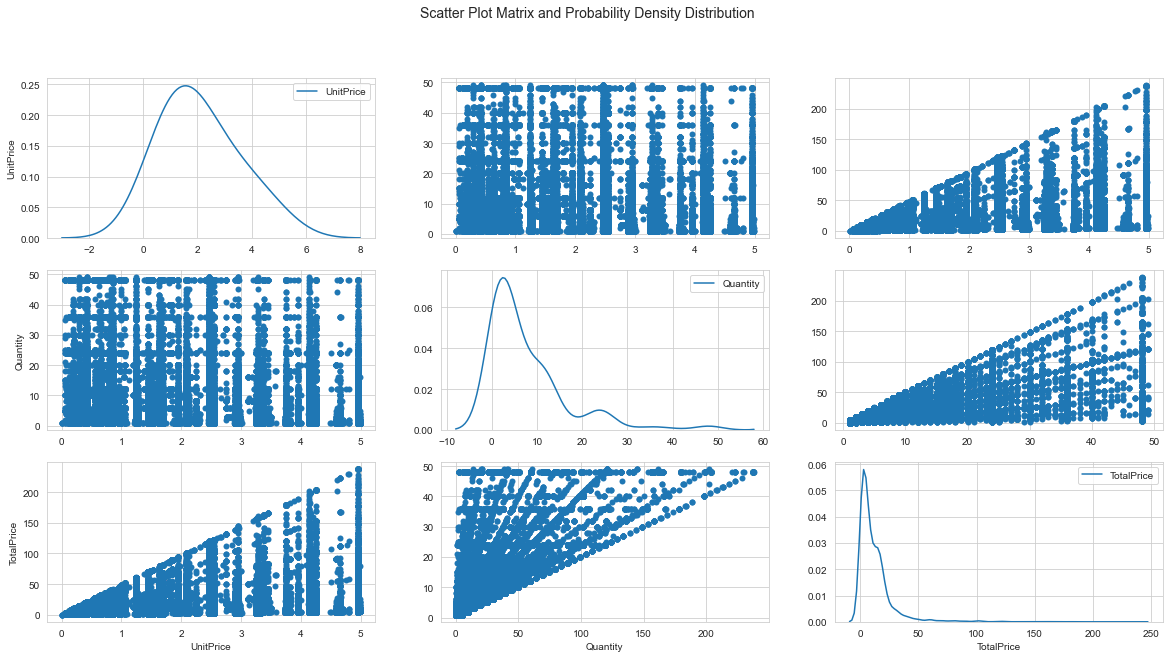

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(online_retail_df['UnitPrice'], bw=1, ax=axes[0, 0])
sns.kdeplot(online_retail_df['Quantity'], bw=3, ax=axes[1, 1])
sns.kdeplot(online_retail_df['TotalPrice'], bw=3, ax=axes[2, 2])

sns.scatterplot(x="UnitPrice", y="Quantity", palette="ch:r=-.2,d=.3_r", sizes=(1, 8), linewidth=0, data=online_retail_df, ax=axes[1, 0])
sns.scatterplot(x="UnitPrice", y="TotalPrice", palette="ch:r=-.2,d=.3_r", sizes=(1, 8), linewidth=0, data=online_retail_df, ax=axes[2, 0])

sns.scatterplot(x="UnitPrice", y="Quantity", palette="ch:r=-.2,d=.3_r", sizes=(1, 8), linewidth=0, data=online_retail_df, ax=axes[0, 1])
sns.scatterplot(x="TotalPrice", y="Quantity", palette="ch:r=-.2,d=.3_r", sizes=(1, 8), linewidth=0, data=online_retail_df, ax=axes[2, 1])

sns.scatterplot(x="UnitPrice", y="TotalPrice", palette="ch:r=-.2,d=.3_r", sizes=(1, 8), linewidth=0, data=online_retail_df, ax=axes[0, 2])                
sns.scatterplot(x="Quantity", y="TotalPrice", palette="ch:r=-.2,d=.3_r", sizes=(1, 8), linewidth=0, data=online_retail_df, ax=axes[1, 2])

# Title and labels
plt.suptitle("Scatter Plot Matrix and Probability Density Distribution", fontsize=14)
axes[0, 1].set_ylabel('')
axes[0, 2].set_ylabel('')
axes[1, 2].set_ylabel('')
axes[2, 1].set_ylabel('')

axes[0, 1].set_xlabel('')
axes[0, 2].set_xlabel('')
axes[1, 0].set_xlabel('')
axes[1, 2].set_xlabel('')

axes[0, 0].set_ylabel('UnitPrice')
axes[2, 1].set_xlabel('Quantity')
axes[2, 2].set_xlabel('TotalPrice')

plt.show(fig)
fig.savefig('pairplot.png', dpi=300)

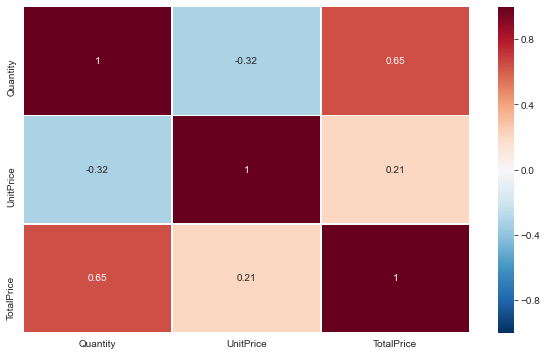

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(online_retail_df.corr(),
            vmin=-1,
            vmax=1,
            linewidths=0.5, 
            cmap='RdBu_r',
           annot=True
           )
plt.show(fig)
fig.savefig('corr_heatmap.png', dpi=300)

Among the variable distributions (UnitPrice, Quantity and TotalPrice) as shown in the above figure, the first intuition that can be derived is that they do not follow a standard guassian/normal distribution. The distribution of the rv-functions TotalPrice and Quantity are heavily skewed on the right and follow Weibull distribution. A log-transformation on these variables can casue the distribution to change shape and become less skewed. Eventhough, both these variables follow same distribution, 'Quantity' has higher variance when compared to 'Total Price'. At the same time, the rv-function 'UnitPrice' follows almost a normal distribution with higher variance and a little positve skewness.

Let us understand the scatter plot and the correlation heatmap of the continuos rv-functions. The variable 'UnitPrice' is highly correlated the attribute 'TotalPrice'. Generally it may not be clear that, there is a causal relationship between the variables with high correlation. However, in this case the increase in the value of rv-function 'Quantity' has a direct causal impact on the rv-function 'TotalPrice'. The correlation between the variables UnitPrice and Quantity, and the variables UnitPrice and TotalPrice are significantly low. However, it is suprsing to see less correlation between the variables UnitPrice and TotalPrice, eventhough there exists a casual relationship between them. The diagonal values in the correlation heat map diagram are equal to 1, since it represents the correlation between the same attributes.

## Discrete variable distribution

### Top 10 Countries by Sales Volume and Revenue

Let's now start looking at the distributions of discrete variables in our dataset. First, we will take a look at the top 10 countries by the volume of transactions. The dataset contains 35 countries to which customers belong. The idea is to aggregate the records by countries and count the number of transactions occurred in each country, then sort the resulting dataframe in descending order of their sales volume. We can do the same thing to obtain the top 10 countries by the revenue generated from the transactions. The chart of top 10 countries by their sales volume and revenue are as shown in the below figures.

In [37]:
# Number of transactions by country
numTransactionsByCountry = online_retail_df[['CustomerID', 'Country']].groupby('Country').count()
numTransactionsByCountry.rename({'CustomerID': 'NumberOfCustomers'}, axis=1, inplace=True)
numTransactionsByCountry = numTransactionsByCountry.sort_values(['NumberOfCustomers'], ascending=[False])[:10]

In [38]:
# Revenue by country
revenueByCountry = online_retail_df[['TotalPrice', 'Country']].groupby('Country').sum()
revenueByCountry.rename({'TotalPrice': 'TotalRevenue'}, axis=1, inplace=True)
revenueByCountry = revenueByCountry.sort_values(['TotalRevenue'], ascending=[False])[:10]

In [39]:
temp_df = online_retail_df[online_retail_df['Country']!='United Kingdom']
numTransactionsByCountry = temp_df[['TotalPrice', 'Country']].groupby('Country').sum()
numTransactionsByCountry.rename({'TotalPrice': 'TotalRevenue'}, axis=1, inplace=True)
numTransactionsByCountry = numTransactionsByCountry.sort_values(['TotalRevenue'], ascending=[False])[:10]

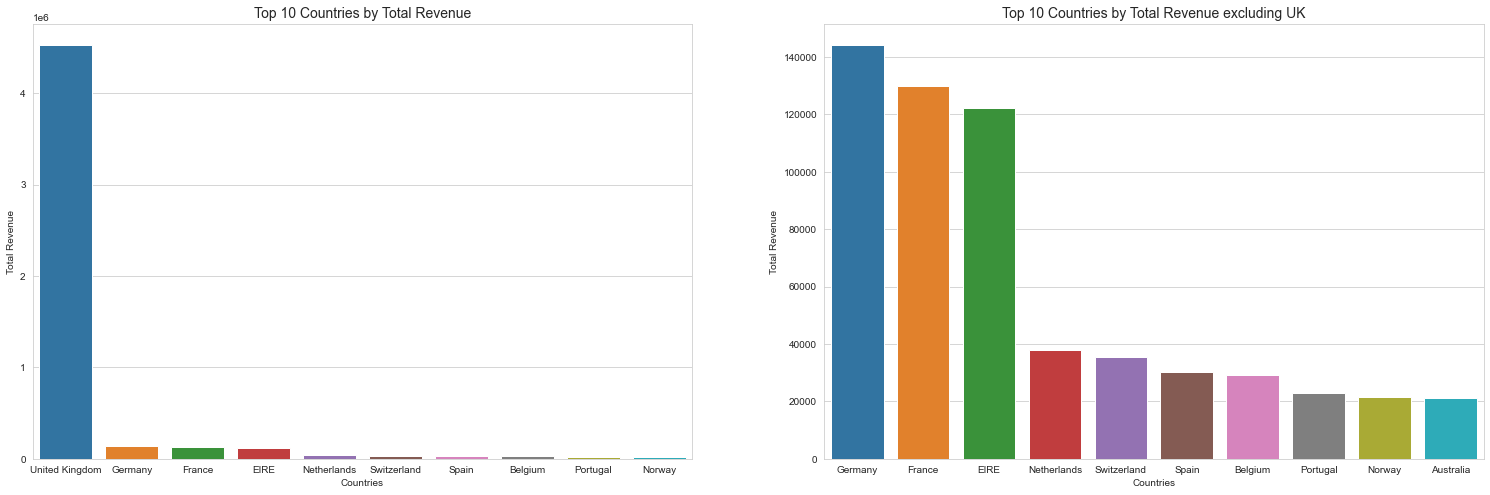

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(26,8))

sns.barplot(x = revenueByCountry.index , y = revenueByCountry['TotalRevenue'], 
            estimator=max, ax=axes[0])

sns.barplot(x = numTransactionsByCountry.index , y = numTransactionsByCountry['TotalRevenue'], 
            estimator=max, ax=axes[1])

# Title and labels
axes[0].set_xlabel('Countries')
axes[0].set_ylabel('Total Revenue')
axes[0].set_title("Top 10 Countries by Total Revenue", fontsize=14)

axes[1].set_xlabel("Countries")
axes[1].set_ylabel("Total Revenue")
axes[1].set_title("Top 10 Countries by Total Revenue excluding UK", fontsize=14)

plt.show(fig)

fig.savefig('top10countries.png', dpi=300)

The charts of top 10 countries by sales volume and revenue shows that for this company by far the highest contribution to its sales and revenue comes from United Kingdom, which is showing its local success. Since most of the revenue comes from UK customers and very less revenue is from countries other than UK, it does not give any clustering related insight for each country. If clustering is the goal, then it is easier to mark all non-UK countries as "nonUK" instead of having 35 separate country variable labels. 

### Top 10 Best Selling Stocks by Earnings

Now we're going to look at the top 10 selling items by the amount of revenue they generate. The first step to get this data is to aggregate the records by the countries and sum up the Total Price of each transaction. I have used bar plots for showing this distribution as seen in the below figure.

In [41]:
top10stock = online_retail_df[['StockCode', 'TotalPrice']].groupby('StockCode').sum().nlargest(10,['TotalPrice']).reset_index()

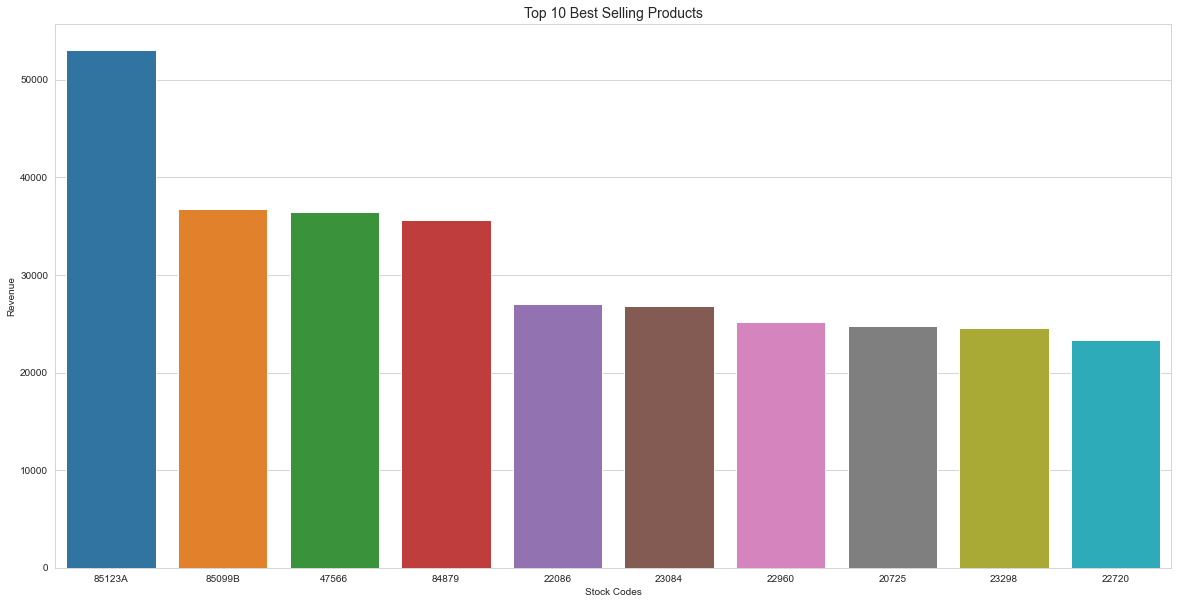

In [42]:
# Initialize the plot
fig, axes = plt.subplots(figsize=(20,10))

sns.barplot(data = top10stock ,x = 'StockCode' ,y = 'TotalPrice', estimator=max, ax=axes)

# Title and labels
axes.set_xlabel('Stock Codes')
axes.set_ylabel('Revenue')
axes.set_title("Top 10 Best Selling Products", fontsize=14)

plt.show(fig)
fig.savefig('top10stocks.png', dpi=300)

In [43]:
online_retail_df.loc[online_retail_df["StockCode"]=="85123A"]["Description"].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

The above barplot of top-10 selling products by revenue suggests that the products have their revenue skewed positively, meaning there are higher values which make the distribution of revenues skewed to the right. The graph reveals that the number one selling item is 'WHITE/CREAM HANGING HEART T-LIGHT Keeper' whose stock-code is '85123A'.

### Customer distribution by Revenue

CustomerID is another important discrete rv-function, from which we can get to know the distribution of Customers by the amount of money they contribute to the overall revenue of the company. This can be understood from the below histogram.

In [44]:
# Number of transactions by country
revenueByCustomer = online_retail_df[['CustomerID', 'TotalPrice']].groupby('CustomerID').sum()
revenueByCustomer.rename({'TotalPrice': 'Revenue'}, axis=1, inplace=True)

In [45]:
print("Total number of unique Customers is {}".format(revenueByCustomer['Revenue'].count()))
print("Total number of unique customers with revenue less than 2500 is {}".format(revenueByCustomer[revenueByCustomer['Revenue']<2500].count()[0]))

Total number of unique Customers is 4211
Total number of unique customers with revenue less than 2500 is 3785


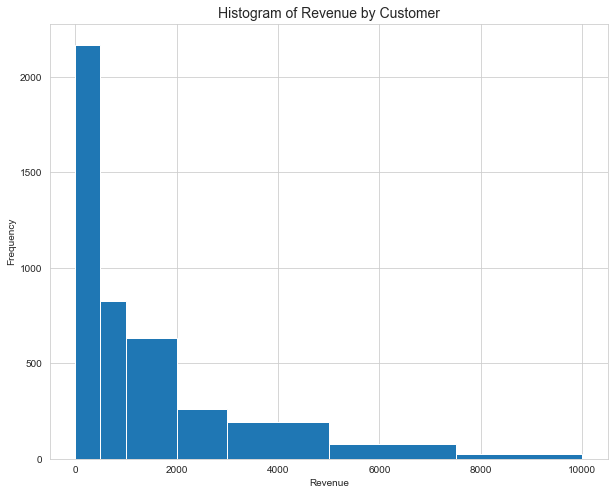

In [46]:
bins = [0, 500, 1000, 2000, 3000, 5000, 7500, 10000]

fig, axes = plt.subplots(figsize=(10,8))
# sns.distplot(revenueByCustomer, bins=bins, kde=False, color='navy' ,ax=axes)
revenueByCustomer['Revenue'].hist(bins=bins, ax=axes)

# Title and labels
axes.set_xlabel('Revenue')
axes.set_ylabel('Frequency')
axes.set_title("Histogram of Revenue by Customer", fontsize=14)

plt.show(fig)
fig.savefig('revenuebyCustomer.png', dpi=300)

The above histogram of customers by revenue outlines the distribution of customers on the basis of amount of money they spend on the purchase of products from the company. From the positive skewness of the plot it is safe to assume that there are lot of customers in the range of 0-1000 Sterling revenue. Outlier exists in the higher ranges of the revenue. Out of total 4211 unique customers who contribute to the overall revenue of the company, there are 3785 customers whose individual contribution is between 0-2500 Sterling.

## Time Series

### Revenue over Time

In [47]:
# df for time series analysis of 5 countries by their total revenue
sales_df = online_retail_df
sales_df['Month'] = online_retail_df['FullDate'].dt.month
sales_df_grouped = sales_df[['Month','InvoiceNo', 'Country']].groupby(['Month','Country']).count().sort_values(['InvoiceNo'], ascending=[False])
sales_df_grouped.reset_index(inplace=True)
countries = ['United Kingdom', 'Germany', 'France', 'Spain', 'Belgium']
sales_df_grouped = sales_df_grouped[sales_df_grouped.Country.isin(countries)].sort_values('Month')

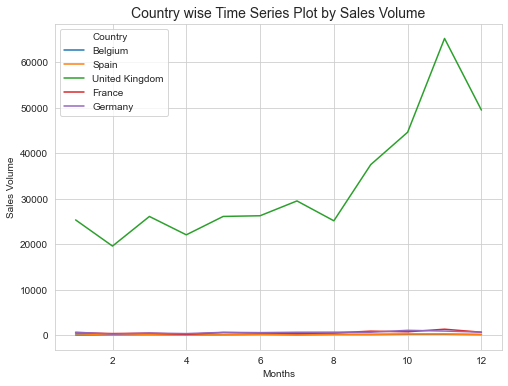

In [48]:
# Initialize the plot
fig, axes = plt.subplots(figsize=(8, 6))

sns.lineplot(x=sales_df_grouped['Month'], 
                 y=sales_df_grouped['InvoiceNo'],
                 hue=sales_df_grouped['Country'], ax=axes
                )

# Title and labels
axes.set_xlabel('Months')
axes.set_ylabel('Sales Volume')
axes.set_title("Country wise Time Series Plot by Sales Volume", fontsize=14)

plt.show()

In [49]:
# df for time series analysis of 5 countries by their total revenue
tmp_df = online_retail_df
tmp_df['Month'] = online_retail_df['FullDate'].dt.month
tmp_df_grouped = tmp_df[['Month','TotalPrice', 'Country']].groupby(['Month','Country']).sum().sort_values(['TotalPrice'], ascending=[False])
tmp_df_grouped.reset_index(inplace=True)
countries = ['United Kingdom', 'Germany', 'France', 'Spain', 'Belgium']
tmp_df_grouped = tmp_df_grouped[tmp_df_grouped.Country.isin(countries)].sort_values('Month')

In [50]:
countries = ['Germany', 'France', 'Spain', 'Belgium', 'EIRE']
tmp_df_grouped2 = tmp_df_grouped[tmp_df_grouped.Country.isin(countries)].sort_values('Month')

In [ ]:
# # Initialize the plot
# fig, axes = plt.subplots(figsize=(12, 8))

# sns.lineplot(x=tmp_df_grouped['Month'], 
#                  y=tmp_df_grouped['TotalPrice'], estimator=max, ax=axes)

# # Title and labels
# axes.set_xlabel('Months')
# axes.set_ylabel('Revenue')
# axes.set_title("Country wise Time Series Plot by Revenue", fontsize=14)

# plt.show()

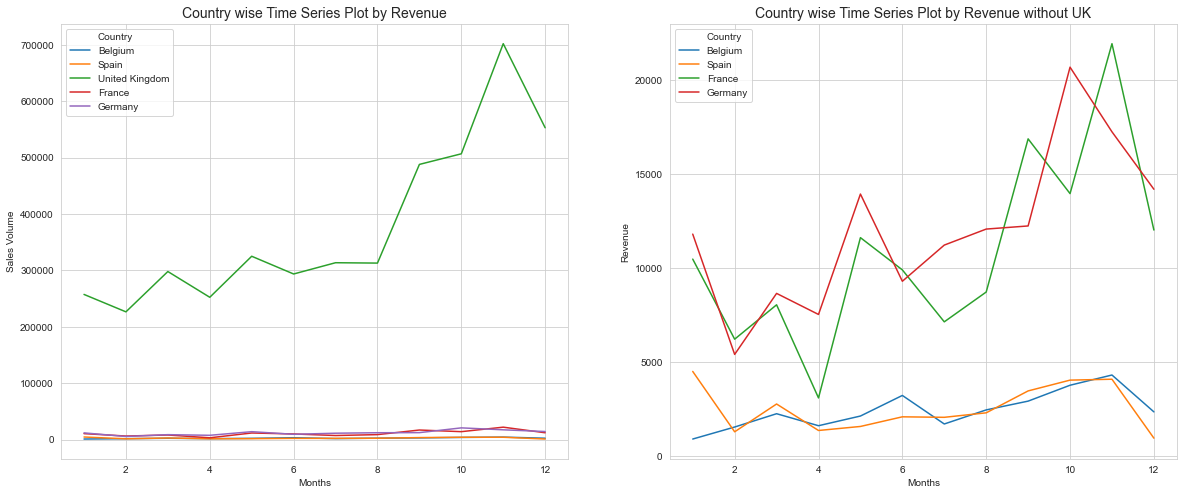

In [51]:
# Initialize the plot
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(x=tmp_df_grouped['Month'], 
                 y=tmp_df_grouped['TotalPrice'],
                 hue=tmp_df_grouped['Country'], ax=axes[0])

sns.lineplot(x=tmp_df_grouped2['Month'], 
                 y=tmp_df_grouped2['TotalPrice'],
                 hue=tmp_df_grouped2['Country'], ax=axes[1])

# Title and labels
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Sales Volume')
axes[0].set_title("Country wise Time Series Plot by Revenue", fontsize=14)

axes[1].set_xlabel('Months')
axes[1].set_ylabel('Revenue')
axes[1].set_title("Country wise Time Series Plot by Revenue without UK", fontsize=14)

plt.show()
fig.savefig('timeSeriesbyCountry.png', dpi=300)

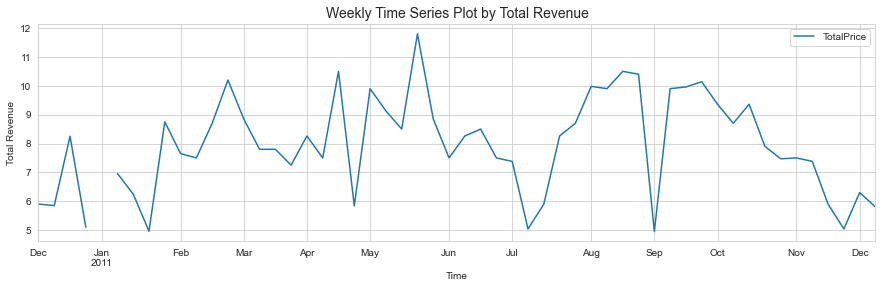

In [52]:
# Initialize the plot
fig, axes = plt.subplots(figsize=(12, 8))

online_retail_df[["TotalPrice"]].resample("W").median().plot(figsize=(15,4), ax=axes)

# Title and labels
axes.set_xlabel('Time')
axes.set_ylabel('Total Revenue')
axes.set_title("Weekly Time Series Plot by Total Revenue", fontsize=14)
plt.legend()
plt.show()
fig.savefig('timeSeriesoverall.png', dpi=300)

Here we will calculate the monthly total revenue of the company and revenue from top 5 countries by their respective revenue value. All in all Sales and Revenue show a positive trend over the period. As seen in time series plot of Revenue vs Time, revenue has been flat most of the time beginning in 2011, but lately there is a upward trend in the last 3 months. The revenue has been picking up for the last 2-3 months during the year. Last month 's data is partial and not complete 30 days as a result of which there is slight fall in revenue. Trend is very similar for both the revenue per month and the sales volume per month. This means that sales volume is a good indicator of the revenue trend. There is an upward trend in the graph without the UK.

## Busiest hours of a day and Busiest day of a week by Sales Volume

Knowing which days of the week or even which hours of the day shoppers are likely to purchase from the company's online store can help the business management to make better decisions in providing customer service and optimizing their operations. So, let's explore on which days the sales are high and at what hours of the day.

In [53]:
# busiest hour of a day
busy_hours = online_retail_df.groupby(online_retail_df['FullDate'].dt.hour)['Quantity'].sum().reset_index()
busy_hours.rename({'FullDate': 'Hour'}, axis=1, inplace=True)

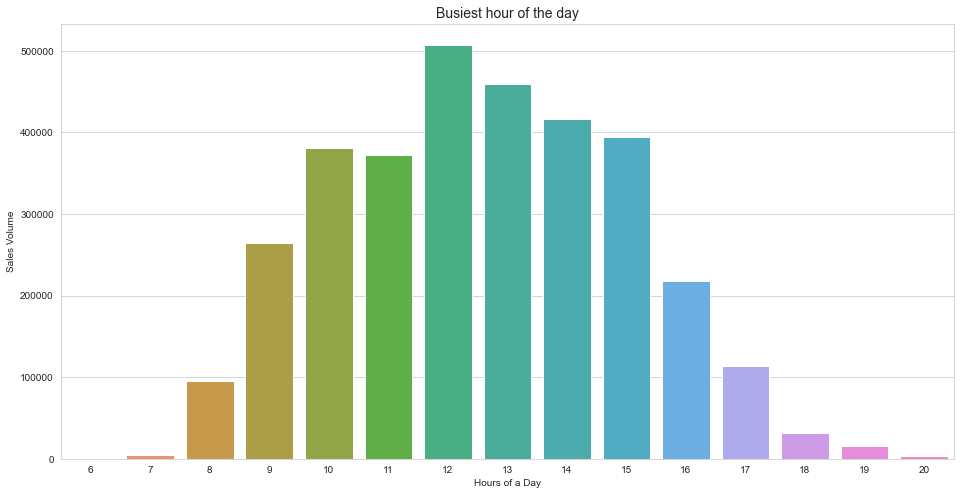

In [54]:
# Initialize the plot
fig, axes = plt.subplots(figsize=(16, 8))

sns.barplot(x=busy_hours['Hour'], y=busy_hours['Quantity'] ,ax=axes)

# Title and labels
axes.set_xlabel('Hours of a Day')
axes.set_ylabel('Sales Volume')
axes.set_title("Busiest hour of the day", fontsize=14)

plt.show(fig)
fig.savefig('busiestHour.png', dpi=300)

The busiest hour of the day is around 12 pm for sales volume. The hourly data, of course, is related trend of the sales in each day. The sales rate started to rise as early as7:00 a.m., peaked at the noon and nearly leveled of until about 3:00 p.m., before falling again in the night. The time period between 10:00 a.m. and 3:00 p.m. are prime time for the sales.

In [55]:
online_retail_df['FullDate'].dt.weekday.unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

In [56]:
# busiest day of a week
busy_days = online_retail_df.groupby(online_retail_df['FullDate'].dt.weekday)['Quantity'].sum().reset_index()
busy_days.rename({'FullDate': 'DayOfWeek'}, axis=1, inplace=True)
# convert days of a week from integer to string
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
busy_days['DayOfWeek'] = busy_days['DayOfWeek'].apply(lambda x: days[x])

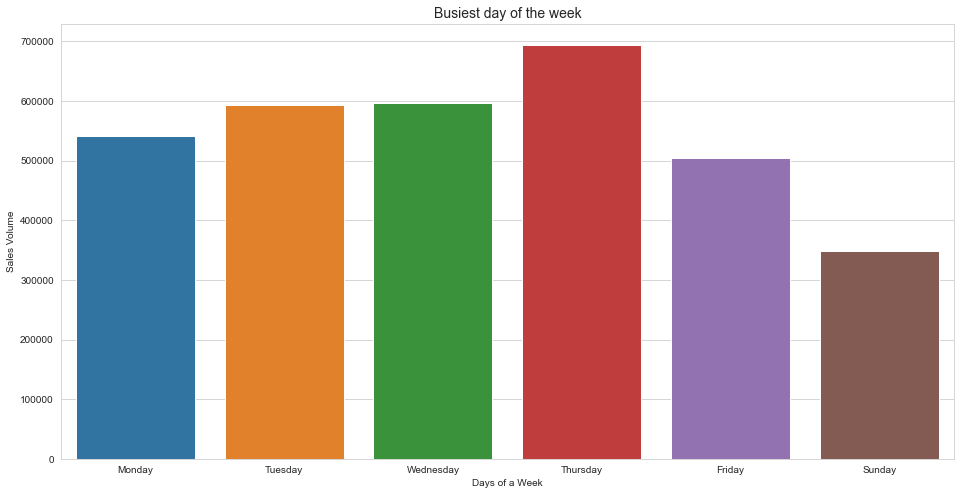

In [57]:
# Initialize the plot
fig, axes = plt.subplots(figsize=(16, 8))

sns.barplot(x=busy_days['DayOfWeek'], y=busy_days['Quantity'],ax=axes)

# Title and labels
axes.set_xlabel('Days of a Week')
axes.set_ylabel('Sales Volume')
axes.set_title("Busiest day of the week", fontsize=14)

plt.show(fig)
fig.savefig('busiestDayofWeek.png', dpi=300)

In [ ]:
# pd.plotting.autocorrelation_plot(online_retail_df["TotalPrice"].resample("SM").median())

The plot shown in the above figure suggests that the sales occur more often over the weekdays than over the weekend. On average, the highest sales occur on Thursdays and remains nearly flat for rest of the days in the week. It can be noticed that, there are no transactions on Saturday. It means the online store may not be available on Saturday or the data is missing in the dataset for Saturday. The seasonality can be clearly observed in the sales over a week. As Thursday approaches, average sales slowly increase, and decrease after Thursday.